## NLP Sentiment Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import nltk
import joblib
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Link - https://www.kaggle.com/datasets/nelgiriyewithana/emotions

In [2]:
#Loading dataset
df = pd.read_csv(r"C:\ml_datasets\Emotions .csv")
df.drop_duplicates(inplace=True)
# print(df.shape)

In [3]:
#checking for null values and info
print(df.isnull().sum())

print(df.info())

print(df['label'].value_counts())

Unnamed: 0    0
text          0
label         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB
None
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


   label  val_count
0      1     141067
1      0     121187
2      3      57317
3      4      47712
4      2      34554
5      5      14972


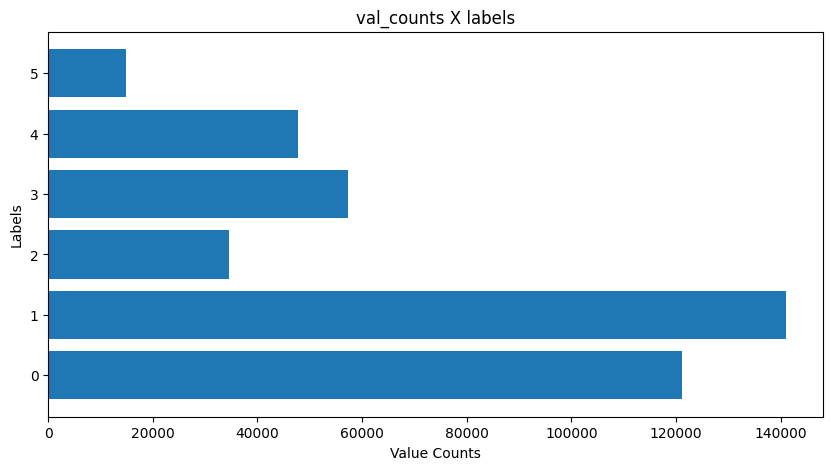

In [4]:
#total labels and their count
label_counts  = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'val_count']
print(label_counts)

plt.figure(figsize=(10,5))
plt.barh(label_counts['label'], label_counts['val_count'])
plt.xlabel('Value Counts')
plt.ylabel('Labels')
plt.title('val_counts X labels')
plt.show()

In [5]:
#downloading different sets from nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#creating a function to Tokenize, Lemmatize and removing stopwords
def preprocess(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Lemmatize and remove stopwords
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

df['processed'] = df['text'].apply(preprocess)
print(df['processed'])

0                        feel really helpless heavy hearted
1         ive enjoyed able slouch relax unwind frankly n...
2                   gave internship dmrg feeling distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughly weary job take...
                                ...                        
416804    feel like telling horny devil find site suited...
416805    began realize feeling agitated restless would ...
416806    feel curious previous early dawn time seek tro...
416807    feel becuase tyranical nature government el sa...
416808    think spent time investigating surroundings th...
Name: processed, Length: 416809, dtype: object


In [7]:
#using bag of words technique to label the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed'])
y = df['label']

In [8]:
#splitting the data in 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify = y)

In [9]:
#training the model using a descision tree
'''model = DecisionTreeClassifier()
# Train the model
model.fit(X_train, y_train)

#creating joblib file to execute directly
joblib.dump(model, r"C:\ml_algorithms\NLP_models\joblib_sentiment_analysis")'''

['C:\\ml_algorithms\\NLP_models\\joblib_sentiment_analysis']

In [10]:
# loading the model using joblib
loaded_model = joblib.load(r"C:\ml_algorithms\NLP_models\joblib_sentiment_analysis")

In [11]:
# Make predictions
y_train_class_preds = loaded_model.predict(X_train)
y_test_class_preds = loaded_model.predict(X_test)

In [12]:
# Evaluate the model using accuracy as a metric
train_accuracy = accuracy_score(y_train, y_train_class_preds)
test_accuracy = accuracy_score(y_test, y_test_class_preds)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9570096597060402
Test Accuracy: 0.8495957390657614


In [17]:
#taking sentence as input and predicting the sentiment
new_sentence = input("Please give a sentence to predict the Sentiment: ")
processed_new_sentence = preprocess(new_sentence)
vectorized_new_sentence = vectorizer.transform([processed_new_sentence])
predicted_sentiment = loaded_model.predict(vectorized_new_sentence)
import random
def response(sntmt:int):
    """the function will return a reply in text form to the sentiment and a sentiment id"""
    dict_0 = {0:["Sadness"], 1:["Joy"], 2:["Love"], 3:["Anger"],
              4:["Fear"], 5:['Surprise']}
    list_0 = dict_0[sntmt]
    return random.choice(list_0),sntmt

response_text,sntmt_id = response(predicted_sentiment[0])
print(sntmt_id)
print(response_text)

1
Joy
